In [78]:
import sys
# sys.path.append('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/CODE_REPOSITORY')
from linear_algebra import *
from gradient_descent import *
print 'IMPORT DONE'

IMPORT DONE


In [49]:
from IPython.display import Image

# SYMMETRICAL NETWORKS

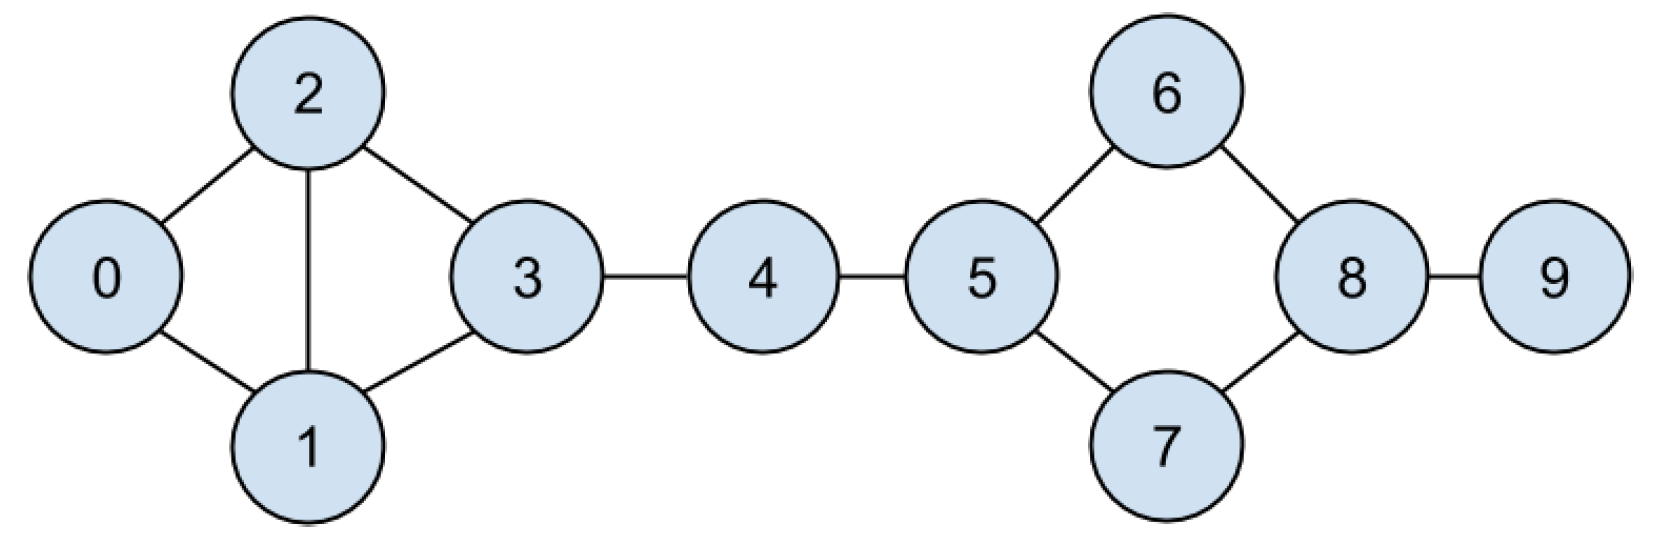

In [50]:
# DEMO: TOY NETWORK
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/symmetrical_network_demo.png', 
      width="35%")

In [51]:
for user in users:
    user["friends"] = []
    # now users becomes:
    # [{'friends': [], 'id': 0, 'name': 'Hero'},
    #  {'friends': [], 'id': 1, 'name': 'Dunn'},
    #  ...
    #  {'friends': [], 'id': 9, 'name': 'Klein'}]
for i,j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

## WELL-CONNECTEDNESS MEASURE

### A. BETWEENNESS CENTRALITY
*  PURPOSE: identifying people who frequently are on the shortest paths between pairs of other people.
*  DEFINITION: the BC of node i is the sum of the proportion of  shortest paths between node j and k that pass through i, for every other node pair j,k.
*  COMPUTATION: compute all the shortest paths between all pairs o people that aren't i, and take the proportion of those paths in which i is passed through.

In [52]:
# SUPPORTING DATA STRUCTURES
#  MAIN FUNCTION: shortest_path_from, arg=fromUser; returns=all shortest paths to every other user.
#  PATH: list of userIDs.
#  DICT: shortestPathTo, key=userIDs; value=lists of paths that end at the user with the specified ID.
#  DEQUE: frontier, tuples of (prevUser, user).

In [53]:
from collections import deque

In [63]:
# MAIN FN: SHORTEST PATH FINDER
def shortest_path_from(fromUser):
    # dict: from 'userID' to *all* shortest paths to that user.
    shortestPathsTo = { fromUser["id"]: [[]] }
    # queue: (prev_user, next_user), 
    # starts out with all pairs of neighbors (fromUser, friendOfFromUser).
    frontier = deque((fromUser, friend) for friend in fromUser["friends"])
    while frontier:
        # remove the user who's first in the queue.
        prevUser, user = frontier.popleft()
        print prevUser['id'] ## TEST
        userID = user["id"]
        pathsToPrevUser = shortestPathsTo[prevUser["id"]]
        newPathsToUser = [path+[userID] for path in pathsToPrevUser] # TODO: print out structure of this one.
        # check if we already know a shortest path in path bank.
        oldPathsToUser = shortestPathsTo.get(userID,[])
        # in the case we DO have old shortest paths, pick out the shorest of shorest.
        if oldPathsToUser: minPathLength = len(oldPathsToUser[0])
        else: minPathLength = float('inf')
        # only keep paths that are <= minPathLength.
        newPathsToUser = [path for path in newPathsToUser if len(path)<minPathLength and
                                                             path not in oldPathsToUser]
        shortestPathsTo[userID] = oldPathsToUser + newPathsToUser
        # add never-seen neighbors to frontier.
        frontier.extend((user, friend) for friend in user["friends"] if friend["id"] not in shortestPathsTo)
    return shortestPathsTo

In [70]:
for user in users:
    user["shortest_paths"] = shortest_path_from(user)
for user in users:
    user["betweenness_centrality"] = .0
for source in users:
    sourceID = source["id"]
    for targetID,paths in source["shortest_paths"].iteritems():
        if sourceID < targetID:
            numPaths = len(paths)
            contrib = 1. / numPaths
            for path in paths:
                for id in path:
                    if id not in [sourceID, targetID]:
                        users[id]["betweenness_centrality"] += contrib

0
0
1
1
2
2
3
3
3
4
4
4
5
5
5
5
5
5
6
7
6
7
6
7
8
8
8
8
8
8
1
1
1
0
2
3
3
4
4
5
5
5
5
6
7
6
7
8
8
8
8
2
2
2
0
1
3
3
4
4
5
5
5
5
6
7
6
7
8
8
8
8
3
3
3
1
1
2
4
5
5
6
7
8
8
4
4
3
3
5
5
1
1
2
6
7
8
8
5
5
5
4
6
7
3
3
8
8
1
1
2
6
6
5
5
8
8
4
3
3
1
1
2
7
7
5
5
8
8
4
3
3
1
1
2
8
8
8
6
7
5
5
4
4
3
3
3
3
1
1
2
1
2
9
8
8
6
7
5
5
4
4
3
3
3
3
1
1
2
1
2


### B. CLOSENESS CENTRALITY
* or, FARNESS, the sum of the lengths of her shortest path to each other user.

In [75]:
def farness(user):
    return sum(len(paths[0]) for paths in user["shortest_paths"].values())
for user in users:
    user["closeness_centrality"] = 1. / farness(user)

### C. EIGENVECTOR CENTRALITY
* The entry in the eigenvector of adjacent matrix that corresponds to a node in network.
* The higher the eigenvector centrality, the more the node is connected to other nodes in the network.

In [79]:
# MATRIX MULTIPLICATION
def matrix_product_entry(A, B, i, j):
    # computes the (i,j) entry.
    return dot(get_row(A, i), get_col(B, j))
def matrix_multiply(A, B):
    n1, k1 = shape(A)
    n2, k2 = shape(B)
    if k1 != n2: # dimension mismatch.
        raise ArithmeticError("incompatible shapes")
    return make_matrix(n1, k2, partial(matrix_product_entry, A, B))

In [83]:
# MATRIX-RELATED VECTOR OPERATIONS
def vector_as_matrix(v): return [[v_i] for v_i in v] 
    # take a list-representation v (e.g. [1, 2, 3]),
    # return vector as a matrix (n x 1), (e.g. [[1],[2],[3]]).
def vector_from_matrix(vAsMatrix): return [row[0] for row in vAsMatrix] # n x 1 -> len(n) list.
def matrix_operate(A, v):
    vAsMatrix = vector_as_matrix(v)
    product = matrix_multiply(A, vAsMatrix)
    return vector_from_matrix(product) # the vector returned will be in list-representation.
A = [[1, 2],
     [2, 3]]
v = [2, 1]
matrix_operate(A, v)

[4, 7]

In [110]:
# FINDING EIGENVECTOR NUMERICALLY
#  picking a start vector, apply matrix_operate on it, 
#   rescale the result to have magnitude 1, repeat until converge.
def find_eigenvector(A, tolerance=.00001):
    guess = [random.random() for _ in A] # iterate n times, where n=nrow(A).
    while True:
        result = matrix_operate(A, guess)
        length = magnitude(result)
        nextGuess = scalar_multiply(1./length, result)
        if distance(guess, nextGuess) < tolerance:
            return nextGuess, length
        guess = nextGuess
A = [[1, 2],
     [2, 3]]
eigenvector, eigenvalue = find_eigenvector(A)
print "Eigenvector: [%.6f, %.6f] ; Eigenvalue: %.6f" % (eigenvector[0],eigenvector[1],eigenvalue)

Eigenvector: [0.525731, 0.850651] ; Eigenvalue: 4.236068


In [115]:
# ADJACENT-MATRIX
#  if friends, 1, 0 otherwise.
def entry_fn(i, j):
    # returns a flattened adjacent matrix.
    return 1 if (i,j) in friendships or (j,i) in friendships else 0
n = len(users)
adjacentMatrix = make_matrix(n, n, entry_fn)
adjacentMatrix

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [120]:
def eigenvector_centrality(i, adjMatrix):
    # returns the ith node's eigenvector centrality.
    return find_eigenvector(adjMatrix)[0][i]
eigenvector_centrality(2, adjacentMatrix)

0.5147887184280899

In [129]:
# ARG SORT IN DESCENDING
np.argsort(find_eigenvector(adjacentMatrix)[0])[::-1]

array([2, 1, 3, 0, 4, 5, 7, 6, 8, 9])

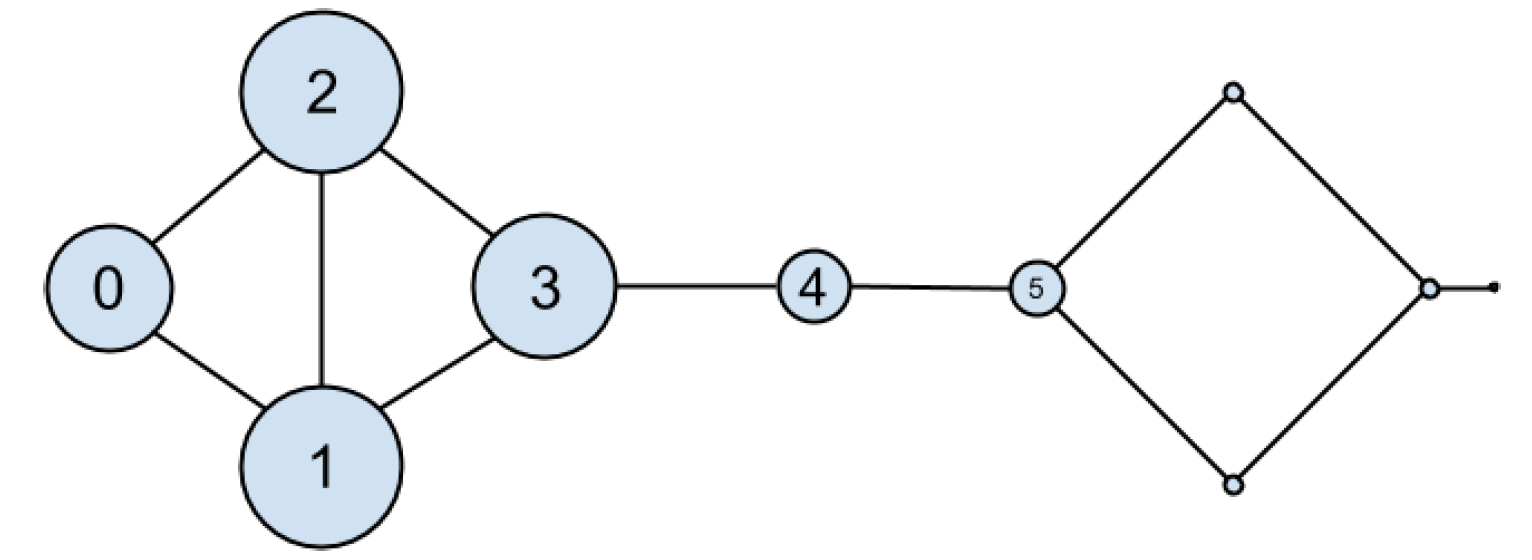

In [123]:
# DEMO
#  The nodes ordered descending in eigenvector centrality coincide with our intuition.
#   e.g. 2 is the highest, because 
#    - it has 3 edges and 
#    - is connected to a high node 3, which is itself 3-edge.
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/eigenvector_centrality_demo.png', 
      width="35%")

# ASYMMETRICAL NETWORKS (DAG & PageRank)

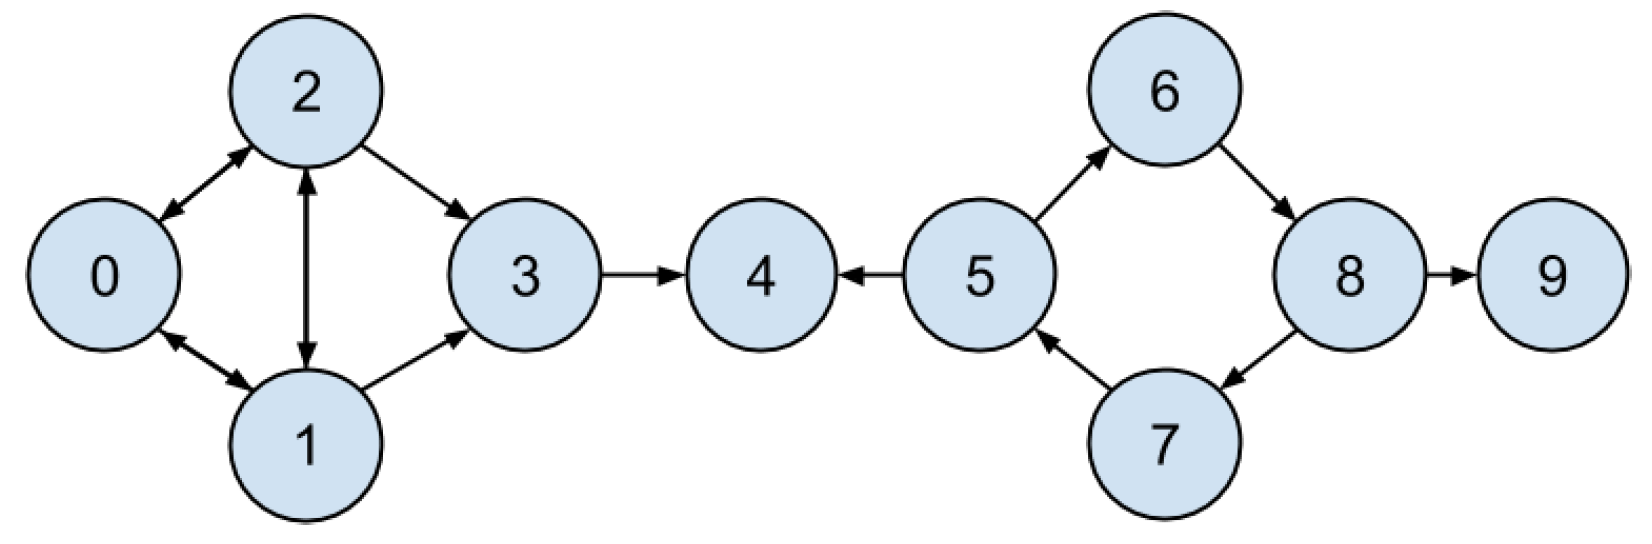

In [145]:
# DEMO
#  (0, 1) means person 0 respects person 1.
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
endorsements = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/asymmetrical_network_demo.png', 
      width="35%")

In [146]:
for user in users:
    user["endorses"] = []
    user["endorsed_by"] = []
for sourceID,targetID in endorsements:
    users[sourceID]["endorses"].append(users[targetID])
    users[targetID]["endorsed_by"].append(users[sourceID])

In [147]:
# MOST RESPECTED NODE
#  caveat: doesn't care who endorse the node, even if the endorsers are phony accounts.
endorsementByID = [(user["id"], len(user["endorsed_by"])) for user in users]
sorted(endorsementByID, key=lambda (userID, numEndorsements): numEndorsements, reverse=True)

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

### PageRank ALGORITHM
* Set PageRank value to 1 (i.e. 100%).
* Initially, distribute PageRank evenly among nodes.
* Iterate n times:
    * A fraction of each node's PageRank is distributed evenly among its OUTGOING links.
    * The ramainder of each node's PageRank is distributed evenly among all nodes.

In [167]:
def page_rank(users, damping=.85, numIter=100): # damping: percentage for OUTGOING links.
    numUsers = len(users)
    # initially, distribute PageRank evenly.
    PR = { user["id"]: 1. / numUsers for user in users }
    basePR = (1. - damping) / numUsers # a small fraction each user gets each iteration.
    for _ in range(numIter):
        nextPR = { user["id"]: basePR for user in users }
        for user in users:
            # distribute PageRank among outgoing links.
            linksPR = PR[user["id"]] * damping # take damping% of a user's PageRank.
            for endorsee in user["endorses"]: # evenly distribute among other users.
                nextPR[endorsee["id"]] += linksPR / len(user["endorses"])
        PR = nextPR
    return PR

In [163]:
sorted([(user, PageRank) for user,PageRank in page_rank(users).iteritems()], key=lambda x:x[1], reverse=True)

[(4, 0.06785083675770529),
 (1, 0.044921190893169885),
 (2, 0.044921190893169885),
 (5, 0.04344422700587085),
 (8, 0.04344422700587085),
 (0, 0.0404553415061296),
 (3, 0.0404553415061296),
 (6, 0.03346379647749512),
 (7, 0.03346379647749512),
 (9, 0.03346379647749512)]

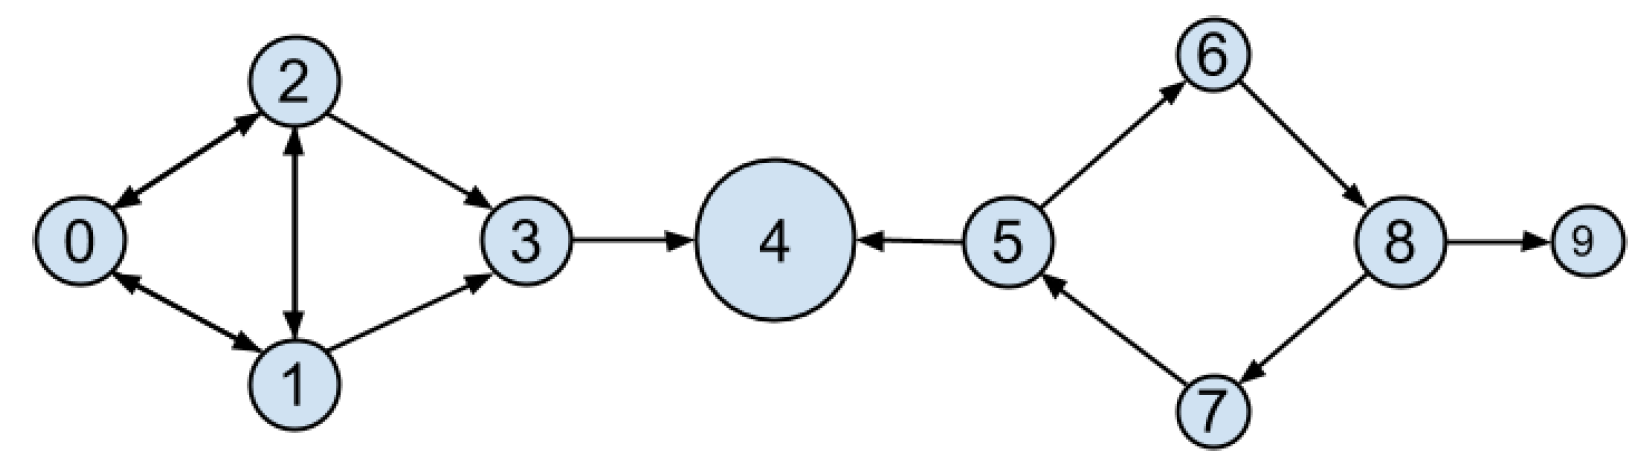

In [164]:
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/pagerank_network_demo.png', 
      width="35%")